In [1]:
import time
import random
import numpy as np
from tkinter import *
from tkinter import ttk

In [2]:
# Class MinimaxCPU
# ----- function -----
# isTAbleFull()
# isWinner()
# minimax()
# Move()

class MinimaxCPU():
    def __init__(self, mark):
        # Initialize each value
        # Win, Lose, Tie, Mark
        self.cpu = [0, 0, 0]
        self.mark = mark
    
    def isTableFull(self, bo):
        if bo.count(' ') > 1:
            return False
        else:
            return True
        
    def isWinner(self, bo, le):
        return ((bo[7] == le and bo[8] == le and bo[9] == le) or
        (bo[4] == le and bo[5] == le and bo[6] == le) or
        (bo[1] == le and bo[2] == le and bo[3] == le) or
        (bo[7] == le and bo[4] == le and bo[1] == le) or
        (bo[8] == le and bo[5] == le and bo[2] == le) or
        (bo[9] == le and bo[6] == le and bo[3] == le) or
        (bo[7] == le and bo[5] == le and bo[3] == le) or 
        (bo[9] == le and bo[5] == le and bo[1] == le)) 
    
    def minimax(self, bo, depth, isMaximizing, alpha, beta):
        if self.mark == 'X':
            if self.isWinner(bo, 'O'):
                return -10
            if self.isWinner(bo, 'X'):
                return 10
            if self.isTableFull(bo) or depth == 0:
                return 0 
        
            if isMaximizing :
                bestscore = -999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'X' 
                        score = self.minimax(bo, depth - 1, False, alpha, beta)
                        bo[cell] = ' '
                        if score > bestscore:
                            bestscore = score
                        if bestscore > alpha:
                            alpha = bestscore
                        if beta <= alpha:
                            break
               
                return bestscore

            else :
                bestscore = 999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'O'
                        score = self.minimax(bo, depth - 1, True, alpha, beta)
                        bo[cell] = ' '
                        if score < bestscore:
                            bestscore = score
                        if bestscore < beta:
                            beta = bestscore
                        if beta <= alpha:
                            break
                            
                return bestscore
        else:
            if self.isWinner(bo, 'O'):
                return 10
            if self.isWinner(bo, 'X'):
                return -10
            if self.isTableFull(bo) or depth == 0:
                return 0 
            
            if isMaximizing :
                bestscore = -999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'O' 
                        score = self.minimax(bo, depth - 1, False, alpha, beta)
                        bo[cell] = ' '
                        if score > bestscore:
                            bestscore = score
                        if bestscore > alpha:
                            alpha = bestscore
                        if beta <= alpha:
                            break
               
                return bestscore

            else :
                bestscore = 999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'X'
                        score = self.minimax(bo, depth - 1, True, alpha, beta)
                        bo[cell] = ' '
                        if score < bestscore:
                            bestscore = score
                        if bestscore < beta:
                            beta = bestscore
                        if beta <= alpha:
                            break
                            
                return bestscore
        
    def Move(self, table):
        bestscore = -999
        possibleMoves = [x for x, letter in enumerate(table) if letter == ' ' and x != 0]
        bestmove = 0
        bo = []
        for cell in range(10):
            bo.append(table[cell])
            
        if len(possibleMoves) == 9:
            centerorcorner = [1, 3, 5, 7, 9]
            pos = random.randint(0, 4)
            bestmove = centerorcorner[pos]
        else :
            for moves in possibleMoves:
                #print('-------------' + str(moves) + "--------------" )
                bo[moves] = self.mark
                score = self.minimax(bo, len(possibleMoves), False, -999, 999)
                bo[moves] = " "
                #print(score)
                if score > bestscore:
                    bestscore = score
                    bestmove = moves
                
        return bestmove        
        

In [3]:
# class GameMaster
# ----- function -----
# resetTable()
# getRandomFirst()
# printTable()
# isTableFull()
# isWinner()
# insertTable()
# play()
# resetScreen()
# screenChange()

class GameMaster():
    def __init__(self, cpu1, cpu2):
        #Initialize each variables
        self.table = [" " for x in range(10)]
        self.turn = None
        # CPU
        self.cpu1 = cpu1
        self.cpu2 = cpu2
        
    def resetTable(self):
        self.table = [" " for x in range(10)]
        
    def getRandomFirst(self):
        # self.turn number is a 0 or 1 value 
        # odd numbers: cpu1 is first, cpu2 is second
        # even numbers: cpu1 is second, cpu2 is first
        self.turn = random.randrange(0, 2)
            
    def printTable(self, bo):
        print('   |   |')
        print(' ' + bo[1] + ' | ' + bo[2] + ' | ' + bo[3])
        print('   |   |')
        print('-----------')
        print('   |   |')
        print(' ' + bo[4] + ' | ' + bo[5] + ' | ' + bo[6])
        print('   |   |')
        print('-----------')
        print('   |   |')
        print(' ' + bo[7] + ' | ' + bo[8] + ' | ' + bo[9])
        print('   |   |')
        
    def isTableFull(self, bo):
        if bo.count(' ') > 1:
            return False
        else:
            return True
    
    def isWinner(self, bo, le):
        return ((bo[7] == le and bo[8] == le and bo[9] == le) or
        (bo[4] == le and bo[5] == le and bo[6] == le) or
        (bo[1] == le and bo[2] == le and bo[3] == le) or
        (bo[7] == le and bo[4] == le and bo[1] == le) or
        (bo[8] == le and bo[5] == le and bo[2] == le) or
        (bo[9] == le and bo[6] == le and bo[3] == le) or
        (bo[7] == le and bo[5] == le and bo[3] == le) or 
        (bo[9] == le and bo[5] == le and bo[1] == le)) 

    def insertTable(self, letter, pos):
        self.table[pos] = letter
    
    def play(self, gui):
        
        self.resetTable()
        self.getRandomFirst()
        self.resetScreen(gui)
        #self.printTable(self.table)

        WinFlag = True
        while WinFlag:
            # Check the curent table's state:
            # CPU1 Win : CPU2 Lose 
            if self.isWinner(self.table, self.cpu1.mark):  
                print('cpu1 O s win this time')
                self.cpu1.cpu[0] = self.cpu1.cpu[0] + 1
                self.cpu2.cpu[1] = self.cpu2.cpu[1] + 1
                WinFlag = False
                
             # CPU1 Lose : CPU2 Win
            if self.isWinner(self.table, self.cpu2.mark): 
                print('cpu1 O s win this time')
                self.cpu1.cpu[1] = self.cpu1.cpu[1] + 1
                self.cpu2.cpu[0] = self.cpu2.cpu[0] + 1
                WinFlag = False
                            
            # Draw Game: Table is Full
            if self.isTableFull(self.table) and WinFlag:
                print('Nobody win this game')
                self.cpu1.cpu[2] = self.cpu1.cpu[2] + 1
                self.cpu2.cpu[2] = self.cpu2.cpu[2] + 1 
                WinFlag = False
                    
            # Next Action
            if WinFlag:
                if self.turn % 2 == 0:
                    bestmove = self.cpu1.Move(self.table)
                    if bestmove != 0:
                        self.insertTable(self.cpu1.mark, bestmove)
                        self.screenChange(gui, self.cpu1.mark, bestmove)
                else :
                    bestmove = self.cpu2.Move(self.table)
                    if bestmove != 0:
                        self.insertTable(self.cpu2.mark, bestmove)
                        self.screenChange(gui, self.cpu2.mark, bestmove)
                    
                self.turn = self.turn + 1
                
    def resetScreen(self, gui):
        gui.label1['text'] = str('　')
        gui.label2['text'] = str('　')
        gui.label3['text'] = str('　')
        gui.label4['text'] = str('　')
        gui.label5['text'] = str('　')
        gui.label6['text'] = str('　')
        gui.label7['text'] = str('　')
        gui.label8['text'] = str('　')
        gui.label9['text'] = str('　')

        gui.update()
    
    def screenChange(self, gui, mark, bestmove):
        if mark == 'O':
            x = str('〇')
        else:
            x = str('☓')

        if bestmove == 1:
            gui.label1['text'] = x
        elif bestmove == 2:
            gui.label2['text'] = x
        elif bestmove == 3:
            gui.label3['text'] = x
        elif bestmove == 4:
            gui.label4['text'] = x
        elif bestmove == 5:
            gui.label5['text'] = x
        elif bestmove == 6:
            gui.label6['text'] = x
        elif bestmove == 7:
            gui.label7['text'] = x
        elif bestmove == 8:
            gui.label8['text'] = x
        elif bestmove == 9:
            gui.label9['text'] = x
        
        gui.update()
        time.sleep(1)

In [4]:
# class HomeScreen
# ----- function -----
# run()
# close()
# main()

class homeScreen(Tk):
    def __init__(self, tic, battle):
        self.tic = tic
        self.battle = battle
        
        super().__init__()
        self.title('TicTacToe')
        self.label1 = ttk.Label(self, text=str('　'))
        self.label1.grid(column=0, row=0, padx=10, pady=10)

        self.label2 = ttk.Label(self, text=str('　'))
        self.label2.grid(column=1, row=0, padx=10, pady=10)

        self.label3 = ttk.Label(self, text=str('　'))
        self.label3.grid(column=2, row=0, padx=10, pady=10)

        self.label4 = ttk.Label(self, text=str('　'))
        self.label4.grid(column=0, row=1, padx=10, pady=10)

        self.label5 = ttk.Label(self, text=str('　'))
        self.label5.grid(column=1, row=1, padx=10, pady=10)

        self.label6 = ttk.Label(self, text=str('　'))
        self.label6.grid(column=2, row=1, padx=10, pady=10)

        self.label7 = ttk.Label(self, text=str('　'))
        self.label7.grid(column=0, row=2, padx=10, pady=10)

        self.label8 = ttk.Label(self, text=str('　'))
        self.label8.grid(column=1, row=2, padx=10, pady=10)

        self.label9 = ttk.Label(self, text=str('　'))
        self.label9.grid(column=2, row=2, padx=10, pady=10)

        self.button1 = ttk.Button(self, text='Start')
        self.button1.bind('<Button-1>', self.main)
        self.button1.grid(column=1, row=3)

    def run(self):
        self.mainloop()

    def close(self):
        self.destroy() 
    
    def main(self, event):
        for battle in range(self.battle):
            self.tic.play(self)
            time.sleep(1)
            
            if (battle + 1) == self.battle:
                self.protocol("WM_DELETE_WINDOW", self.close)

In [5]:
if __name__ == "__main__":
    print('Welcome to the Tic Tac Toe Game')
    cpu1 = MinimaxCPU("O")
    cpu2 = MinimaxCPU("X")
    tic = GameMaster(cpu1, cpu2)
    battle = 2
    gui = homeScreen(tic, battle)
    gui.run()

Welcome to the Tic Tac Toe Game
Nobody win this game
Nobody win this game


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
    # Print each score (Win, Lose, Tie) in tic.cpu1 and tic.cpu2
    # Win is [0] index's element
    # Lose is [1] index's element
    # Tie is [2] index's element
    print(tic.cpu1.cpu)
    print(tic.cpu2.cpu)

[0, 0, 2]
[0, 0, 2]


In [8]:
    score1 = np.zeros((3, ), dtype=int)
    score2 = np.zeros((3, ), dtype=int)
    score1[0] = gui.tic.cpu1.cpu[0]
    score1[1] = gui.tic.cpu1.cpu[1]
    score1[2] = gui.tic.cpu1.cpu[2]
    score2[0] = gui.tic.cpu2.cpu[0]
    score2[1] = gui.tic.cpu2.cpu[1]
    score2[2] = gui.tic.cpu2.cpu[2]

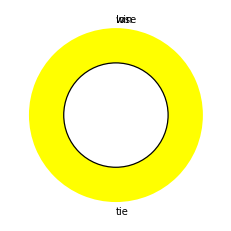

In [9]:
    #Score1(CPU1)
    # Red is "Win" color
    # Blue is "Lose" color
    # Yellow is "Tie" color
    label = ["win", "lose", "tie"]
    colors = ["red", "blue", "yellow"]
    plt.pie(score1, labels=label, counterclock=False, startangle=90, colors=colors)
    centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

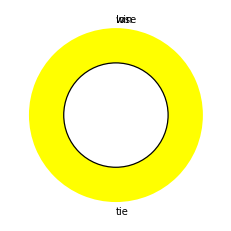

In [10]:
    #Score2(CPU2)
    label = ["win", "lose", "tie"]
    colors = ["red", "blue", "yellow"]
    plt.pie(score2, labels=label, counterclock=False, startangle=90, colors=colors)
    centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)